In [1]:
import ROOT 
from larcv import larcv 
import numpy as np 
import matplotlib.pyplot as plt

# USE THIS NOTEBOOK WITH THE UBDL SINGULARITY CONTAINER 

Welcome to JupyROOT 6.16/00


In [2]:
_file = "../out_larcv_test.root"
root_file = ROOT.TFile(_file)
print(root_file.ls())

None
TFile**		../out_larcv_test.root	
 TFile*		../out_larcv_test.root	
  KEY: TTree	image2d_wire_tree;1	wire tree
  KEY: TTree	chstatus_wire_tree;1	wire tree
  KEY: TTree	image2d_ssnetshower_tree;1	ssnetshower tree
  KEY: TTree	image2d_ssnettrack_tree;1	ssnettrack tree
  KEY: TTree	sparseimg_larflow_tree;1	larflow tree
  KEY: TTree	image2d_infill_tree;1	infill tree
  KEY: TTree	image2d_inlabel_tree;1	inlabel tree
  KEY: TTree	clustermask_mrcnn_masks_tree;1	mrcnn_masks tree
  KEY: TTree	image2d_ubspurn_plane0_tree;1	ubspurn_plane0 tree
  KEY: TTree	image2d_ubspurn_plane1_tree;1	ubspurn_plane1 tree
  KEY: TTree	image2d_ubspurn_plane2_tree;1	ubspurn_plane2 tree
  KEY: TTree	image2d_sparseuresnet_prediction_tree;1	sparseuresnet_prediction tree
  KEY: TTree	sparseimg_sparseuresnetout_tree;1	sparseuresnetout tree


In [3]:
mask_chain = ROOT.TChain("clustermask_mrcnn_masks_tree")
image_chain = ROOT.TChain("image2d_wire_tree")
mask_chain.AddFile(_file)
image_chain.AddFile(_file)
print("Number of entries :", mask_chain.GetEntries())

entry = 7
plane = 2 # collection plane 
print("Selected entry: ", entry)
print("Selected plane: ", plane)
mask_chain.GetEntry(entry)
image_chain.GetEntry(entry)
mask_data = mask_chain.clustermask_mrcnn_masks_branch
image_data = image_chain.image2d_wire_branch

mask_array = mask_data.as_vector()
image_array = image_data.at(plane)

print("Data type mask: ",mask_data)
print("Data type image: ", image_data)

collection_plane_masks = mask_array[plane]

Number of entries : 10
Selected entry:  7
Selected plane:  2
Data type mask:  <ROOT.larcv::EventClusterMask object at 0xa872c40>
Data type image:  <ROOT.larcv::EventImage2D object at 0xa887750>


In [4]:
x_origins = []
y_origins = [] 
for element in collection_plane_masks:
    element_box = element.box
    origin_x = element_box.min_x()
    origin_y = element_box.min_y() 
    #print("Interaction type :", element.type, "Class probability : ", element.probability_of_class)
    #print("Box origin", origin_x , origin_y )
    x_origins.append(origin_x)
    y_origins.append(origin_y)
    #print("\n")


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  This is separate from the ipykernel package so we can avoid doing imports until


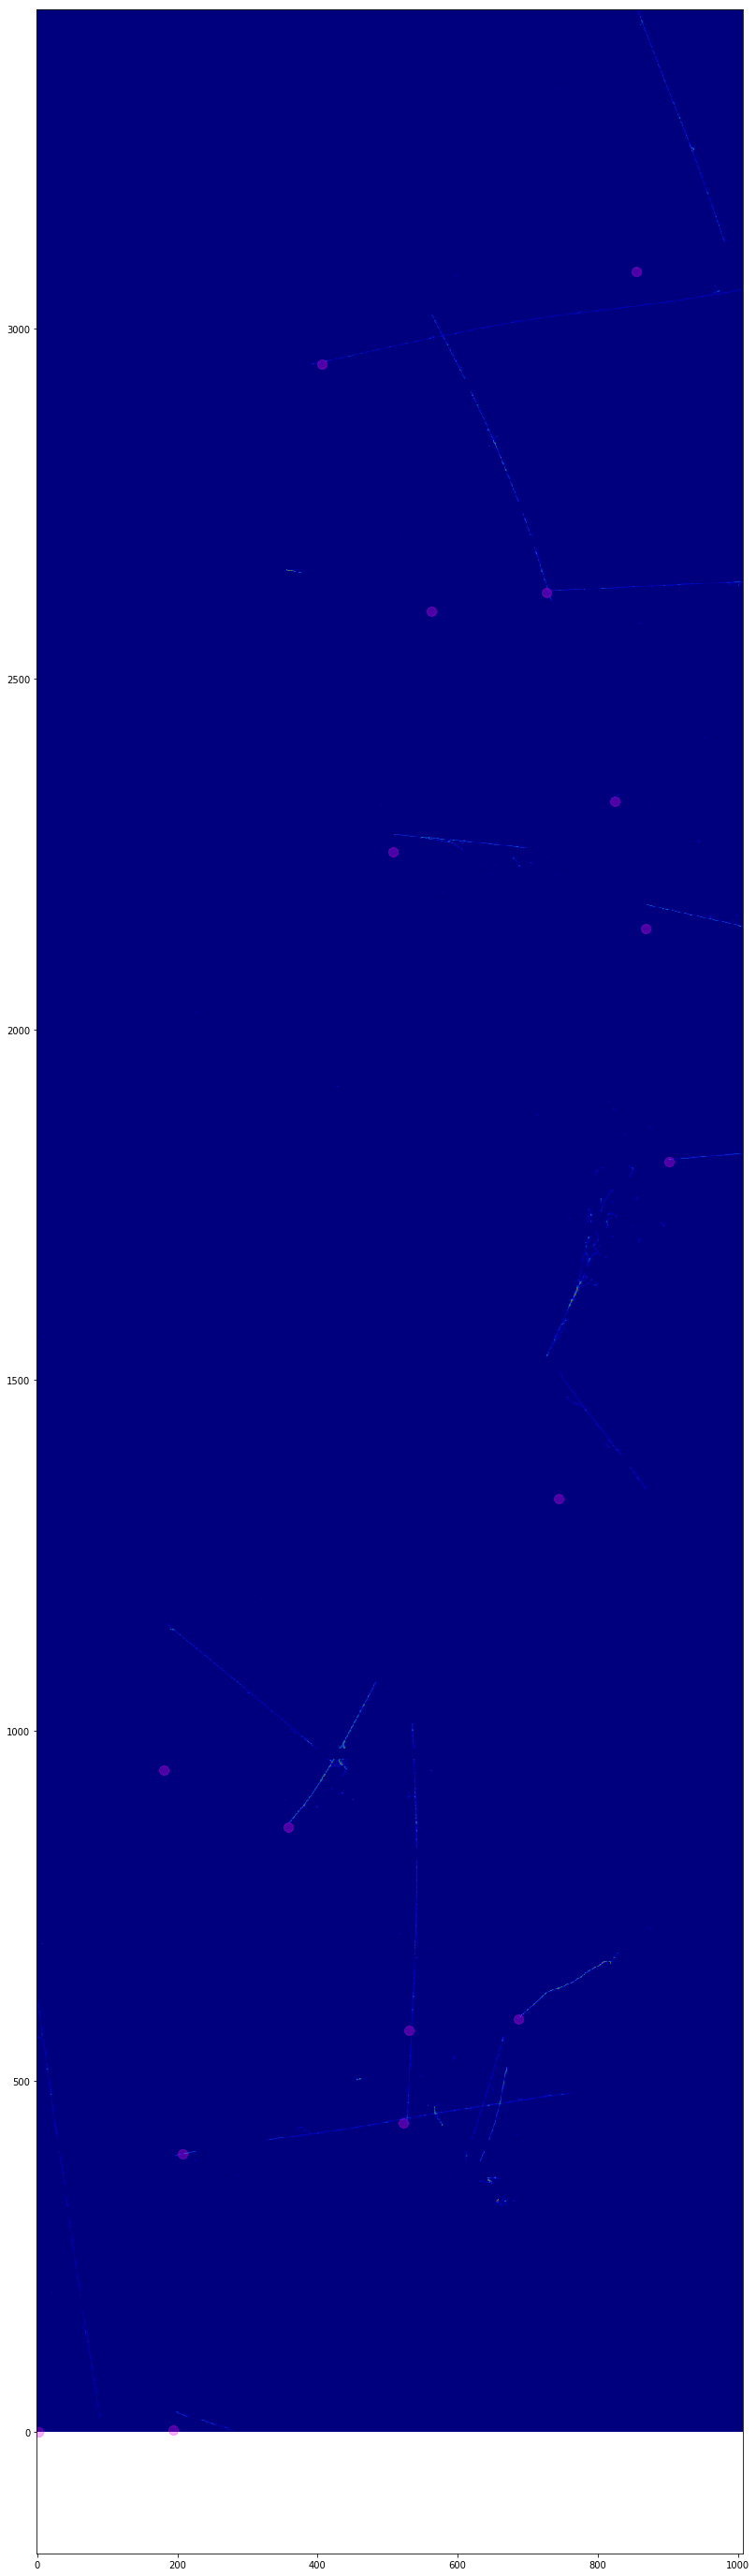

In [5]:
test_mask = np.zeros(np.shape(larcv.as_ndarray(image_array)))
fig, ax1 = plt.subplots(1,1,figsize=(50,50))
ax1.imshow(larcv.as_ndarray(image_array), cmap="jet", origin="lower")
ax1.imshow(test_mask,cmap="jet",origin="lower",alpha = 0.6)
ax1.plot(y_origins, x_origins, "o", markersize=10, color="magenta",alpha = 0.3)

In [6]:
adc_im = larcv.as_ndarray(image_array)
mask_pixels = test_mask = np.zeros(np.shape(larcv.as_ndarray(image_array)))
num_masks = collection_plane_masks.size()
for m_idx in range(0, num_masks):
    for pt_idx in range(collection_plane_masks[m_idx].points_v.size()):
        pt_x = collection_plane_masks[m_idx].box.min_x() + 1 + collection_plane_masks[m_idx].points_v[pt_idx].x
        pt_y = collection_plane_masks[m_idx].box.min_y() + 1 + collection_plane_masks[m_idx].points_v[pt_idx].y
        pt_x = int(pt_x)
        pt_y = int(pt_y)
        
        if(pt_y>1007):
            print("PT_Y out of boundaries")
            pt_y = 1007
        if(pt_x>3445):
            print("PT_X out of boundaries")
            pt_x = 3445
        if(pt_y<0):
            print("PT_Y out of boundaries")
            pt_y = 0
        if(pt_x<0):
            print("PT_x out of boundaries")
        if(adc_im[int(pt_x)][int(pt_y)] > 0):
            mask_pixels[pt_x][pt_y] =  1 # same collor for all pixels
            if(collection_plane_masks[m_idx].type == 1):
                mask_pixels[pt_x][pt_y] = collection_plane_masks[m_idx].probability_of_class;
          
            elif(collection_plane_masks[m_idx].type == 5):
                mask_pixels[pt_x][pt_y] = 0*collection_plane_masks[m_idx].probability_of_class;

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  


PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of boundaries
PT_X out of

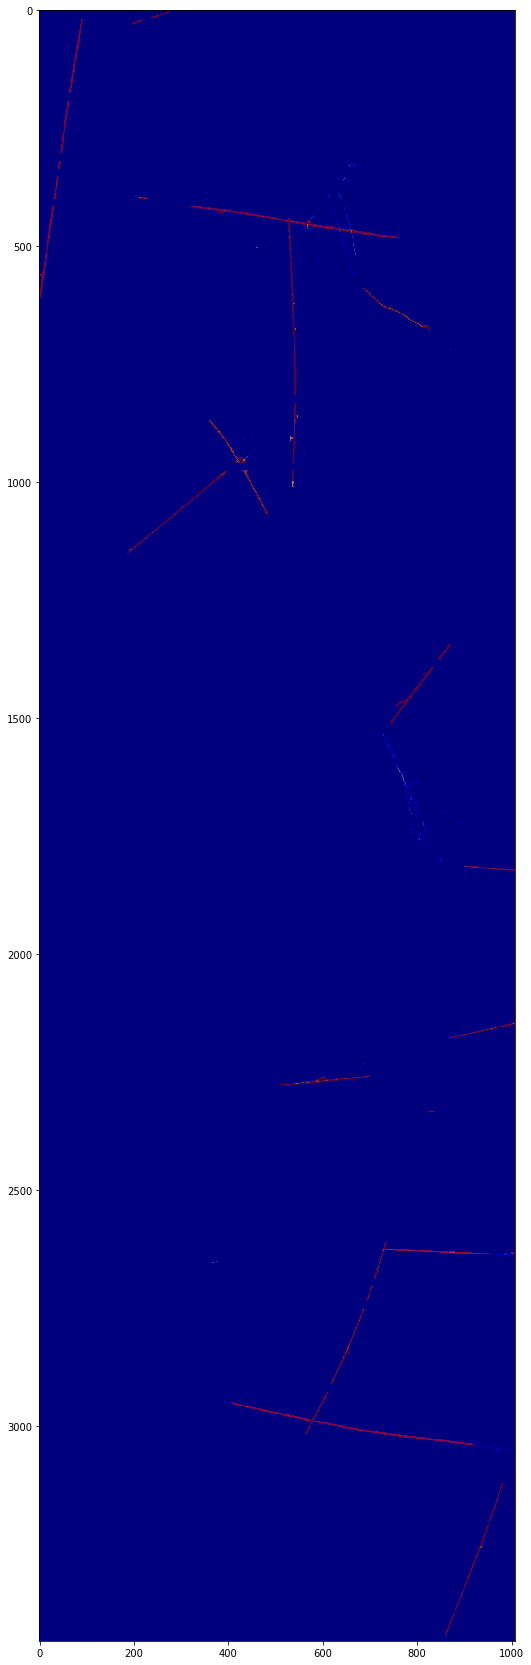

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(100,30))
ax1.imshow(adc_im, cmap="jet")
ax1.imshow(mask_pixels,cmap="jet",alpha = 0.6)